In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
file_path = '/content/heart_disease.xlsx'
data = pd.read_excel(file_path)

In [ ]:
# Display the first 5 rows of the dataset
print(data.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [ ]:
# Check basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [ ]:
# Summary statistics of numerical columns
print(data.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


**Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check for missing values
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [ ]:
# Check data types and unique values in categorical columns
print(data.nunique())

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64


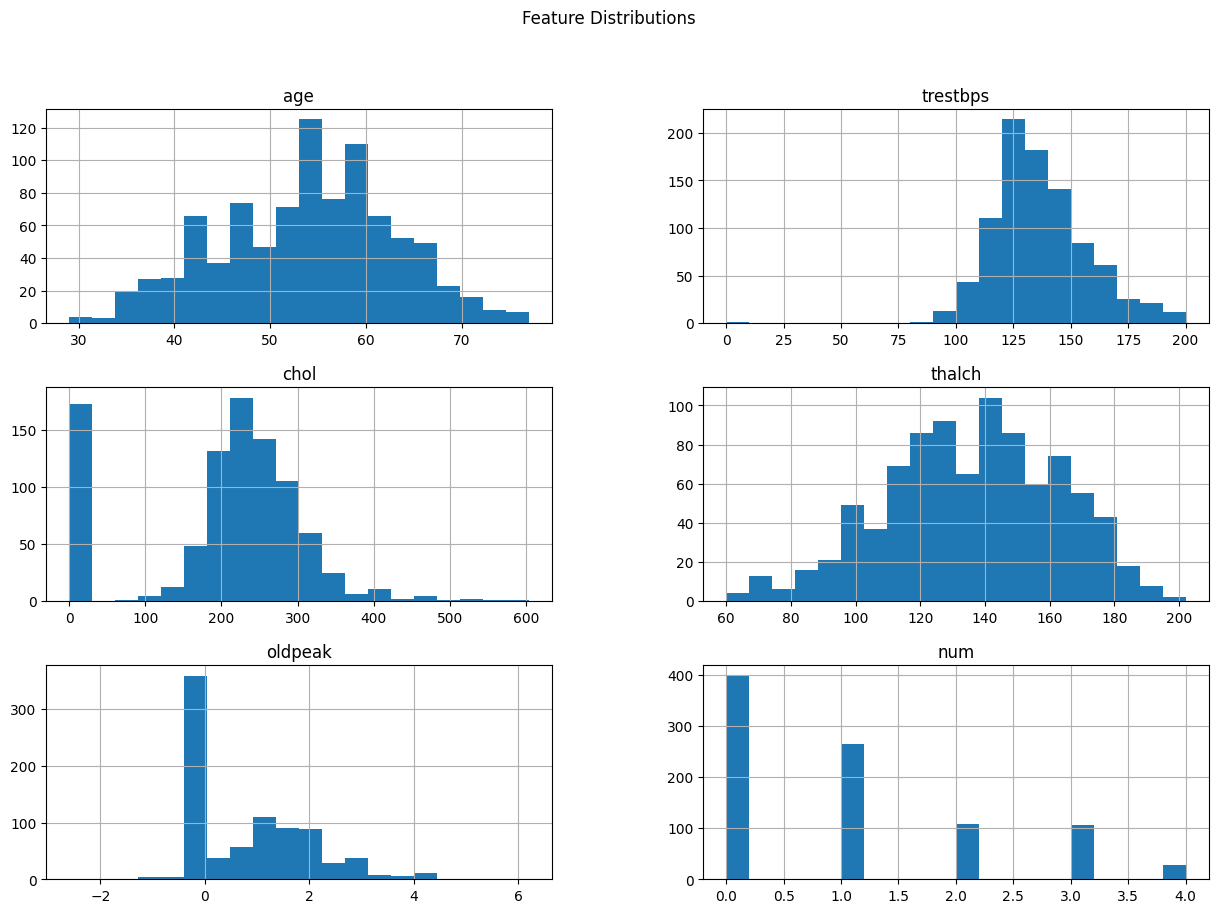

In [ ]:
# Histograms for feature distributions
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

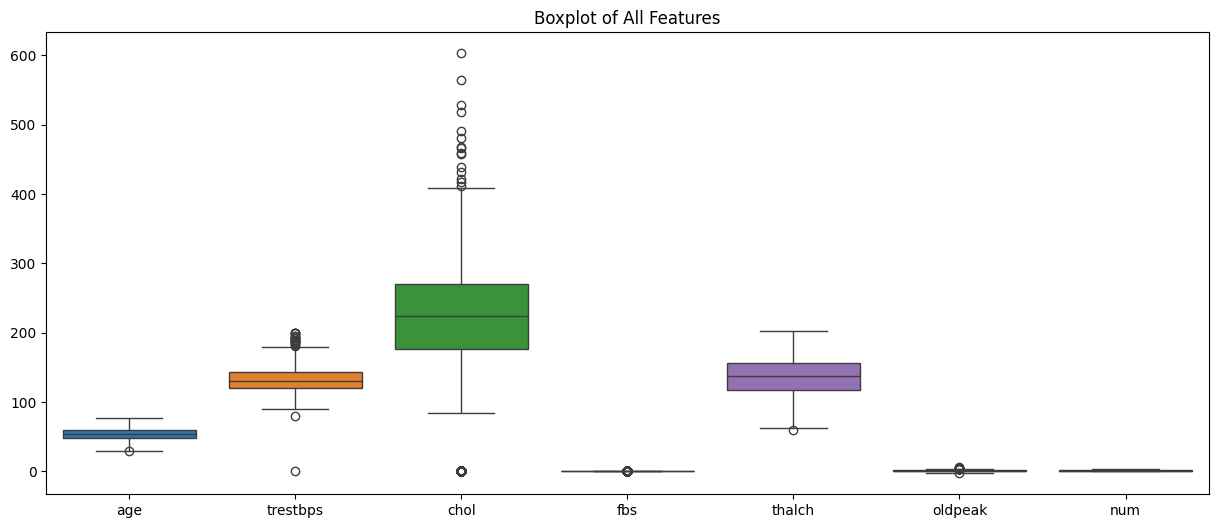

In [ ]:
# Boxplot to identify outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=data)
plt.title("Boxplot of All Features")
plt.show()

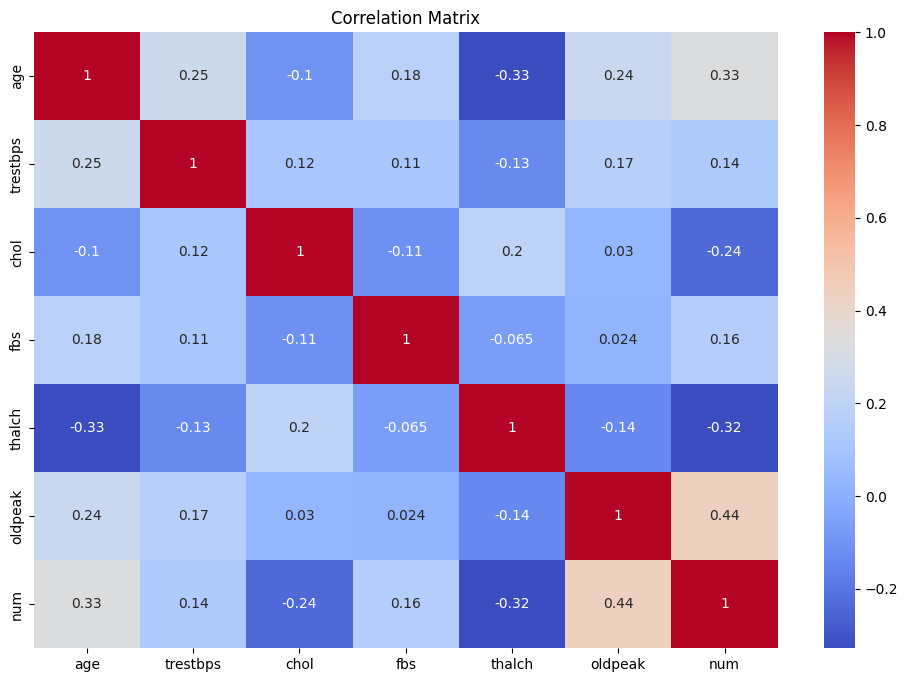

In [ ]:
# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)  # Add numeric_only=True
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Feature Engineering**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Encode categorical variables (if any)
for col in data.select_dtypes(include=['object']).columns:
    # Convert boolean values to strings before encoding
    data[col] = data[col].astype(str)
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)

In [ ]:
print("Data after feature engineering:")
print(data.head())

Data after feature engineering:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.006027  0.514416  2.320276  0.567394  0.281297  1.976894 -1.561352   
1 -1.397560  0.514416  0.232258  0.076967  0.013526 -0.505844  0.013879   
2  0.350503  0.514416 -0.811752  0.322181 -0.084656 -0.505844  0.013879   
3 -0.195767  0.514416  2.320276 -0.756760 -0.138211 -0.505844 -1.561352   
4  0.350503  0.514416 -0.811752 -1.149102 -0.004325 -0.505844  0.013879   

     thalch     exang   oldpeak     slope      thal       num  
0  0.524183 -0.774285  1.288612 -1.672770 -1.589014 -0.881977  
1 -0.147705 -0.774285 -0.815249 -0.224843 -1.589014 -0.881977  
2  0.449529 -0.774285 -0.449360 -0.224843 -1.589014 -0.881977  
3  2.017268 -0.774285 -0.815249 -0.224843 -1.589014 -0.881977  
4 -0.371668  1.260594  0.556834 -0.224843 -1.589014 -0.881977  


Decision Tree Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Split the dataset into features (X) and target (y)
X = data.drop('num', axis=1)
y = data['num']

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model using metrics suitable for regression
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 1.4069173798833372
R-squared: -0.4454375192622271


In [ ]:
print("y_test type:", type(y_test))
print("y_pred type:", type(y_pred))
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))

y_test type: <class 'pandas.core.series.Series'>
y_pred type: <class 'numpy.ndarray'>
Unique values in y_test: {-0.8819769046874117, 1.740845244186507, 2.6151192938111465, 0.8665711945618674, -0.007702855062772214}
Unique values in y_pred: {-0.8819769046874114, 1.740845244186507, 2.6151192938111465, -0.8819769046874117, 0.8665711945618674, -0.8819769046874119, -0.8819769046874116, -0.8819769046874115, -0.007702855062772215, -0.007702855062772214, -0.007702855062772213}


In [ ]:
# Ensure that y_pred contains discrete class labels
y_pred = clf.predict(X_test)

In [ ]:
# Convert y_test to discrete class labels (assuming binary classification)
y_test_class = [1 if p > 0 else 0 for p in y_test]  # Adjust threshold if necessary

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class)) # Use y_test_class instead of y_test

Confusion Matrix:
[[109  28]
 [ 27  18]]


In [ ]:
print("\nClassification Report:")
y_pred_class = [1 if p > 0 else 0 for p in y_pred]  # Convert y_pred to discrete classes
print(classification_report(y_test_class, y_pred_class)) # Use y_test_class and y_pred_class


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       137
           1       0.39      0.40      0.40        45

    accuracy                           0.70       182
   macro avg       0.60      0.60      0.60       182
weighted avg       0.70      0.70      0.70       182



In [ ]:
print("\nAccuracy Score:")
print(accuracy_score(y_test_class, y_pred_class))


Accuracy Score:
0.6978021978021978


**Hyperparameter Tuning with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Perform Grid Search
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor instead of DecisionTreeClassifier
from sklearn.metrics import make_scorer, mean_squared_error # Import necessary modules for regression scoring

# Use 'neg_mean_squared_error' as the scoring metric for regression
scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                          param_grid, cv=5, scoring=scoring)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [ ]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Accuracy: -0.7762471295505299


In [ ]:
# Train the model with the best parameters
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

In [ ]:
# Evaluate the optimized model
print("\nOptimized Model Evaluation:")
# Instead of confusion matrix, use metrics suitable for regression
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best))
print("R-squared:", r2_score(y_test, y_pred_best))


Optimized Model Evaluation:
Mean Squared Error: 0.6977856508172233
R-squared: 0.2831096022300468


**Visualize the Decision Tree**

In [ ]:
from sklearn.tree import plot_tree


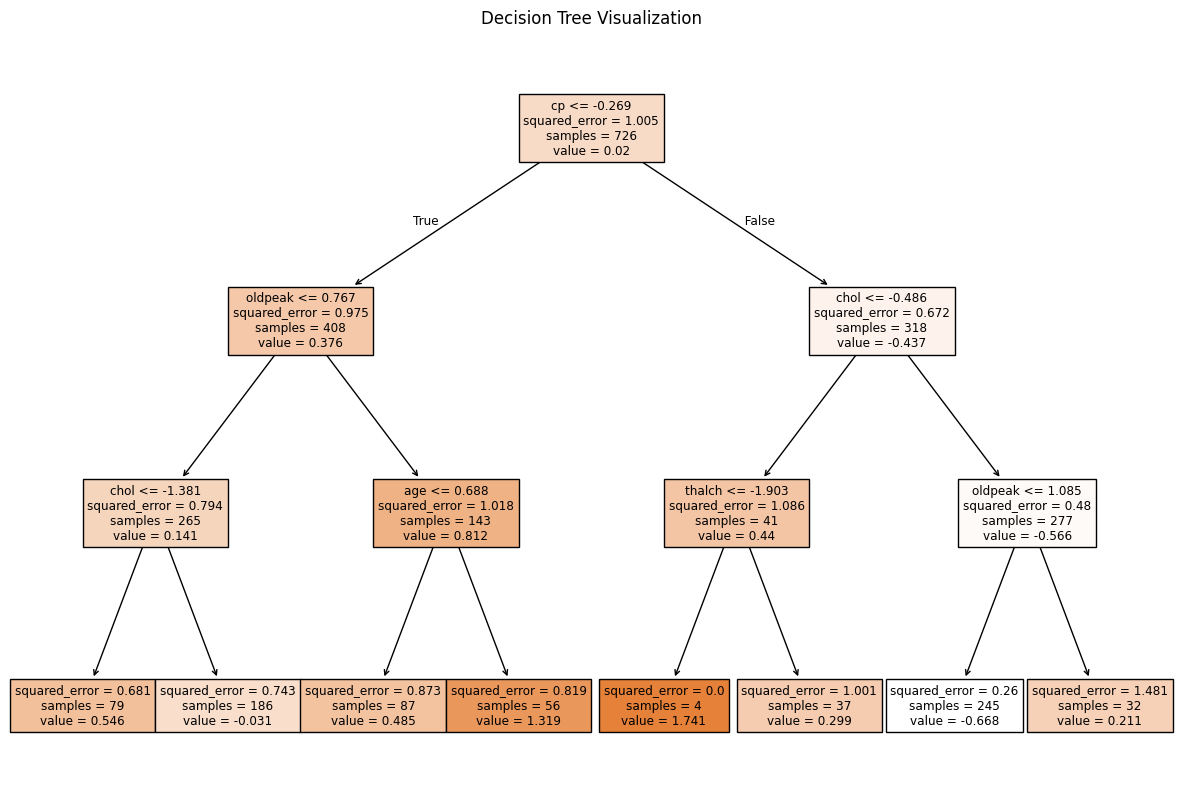

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Interview questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Maximum Depth (max_depth): Limits tree depth; too low causes underfitting, too high causes overfitting.

Minimum Samples Split (min_samples_split): Minimum samples to split a node; higher values reduce complexity.

Minimum Samples Leaf (min_samples_leaf): Minimum samples in a leaf node; higher values prevent overfitting.

Maximum Features (max_features): Number of features considered for splits; low values improve generalization.

Maximum Leaf Nodes (max_leaf_nodes): Limits the number of leaf nodes; lower values reduce complexity.

Criterion (criterion): Defines the function to evaluate splits; affects decision-making in tree construction.

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding

Description: Converts categorical labels into numerical values (e.g., "Red" → 0, "Blue" → 1, "Green" → 2).

Use Case: Suitable for ordinal data where the categories have a meaningful order (e.g., "Low", "Medium", "High").

Limitation: Imposes an arbitrary ordinal relationship on nominal data, which may lead to incorrect interpretations.

One-Hot Encoding

Description: Converts each category into a binary vector where only one element is "1" (e.g., "Red" → [1, 0, 0], "Blue" → [0, 1, 0], "Green" → [0, 0, 1]).

Use Case: Ideal for nominal data where categories do not have any inherent order.

Limitation: Increases dimensionality, especially with a large number of categories.

Key Difference

Label Encoding: Assigns a unique integer to each category.

One-Hot Encoding: Creates a binary vector for each category.






  